#### DO

### Se importan las librerias

In [1]:
# Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

### Se cargan los datos

In [2]:
datos = pd.read_csv("data/DO_anova.csv", sep=";")

datos

,param,mg/L
0,DO80,14.39
1,DO80,14.47
2,DO80,14.41
3,DO80,14.46
4,DO80,14.49
...,...,...
1231,DO1100,13.39
1232,DO1100,13.37
1233,DO1100,13.42
1234,DO1100,13.39


### Número de grupos, observaciones por grupo y distribución de las observaciones

In [3]:
# Número de observaciones por grupo
datos.groupby('param').size()

param
DO1100    618
DO80      618
dtype: int64

In [4]:
# Media y desviación típica por grupo
datos.groupby('param').agg(['mean','std'])

mg/L          
             mean       std
param                      
DO1100  13.345518  0.134359
DO80    14.550000  0.146213

#### Análisis Gráfico

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


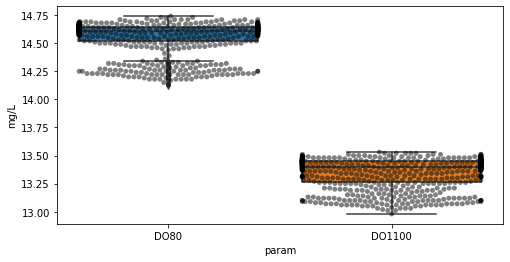

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="param", y="mg/L", data=datos, ax=ax)
sns.swarmplot(x="param", y="mg/L", data=datos, color='black', alpha = 0.5, ax=ax);

## Verificar condiciones para ANOVA

#### Distribución normal de las observaciones

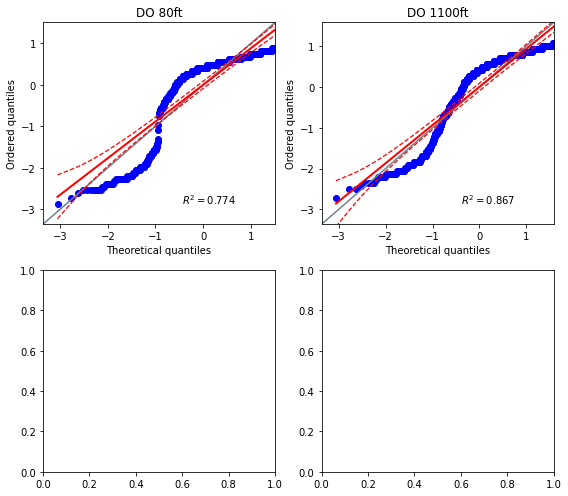

In [6]:
# Gráficos qqplot
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(datos.loc[datos.param =='DO80', 'mg/L'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('DO 80ft')
pg.qqplot(datos.loc[datos.param =='DO1100', 'mg/L'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('DO 1100ft')
plt.tight_layout()

In [7]:
# Test de normalidad Shapiro-Wilk
pg.normality(data=datos, dv='mg/L', group='param')

,W,pval,normal
DO80,0.772617,2.167018e-28,False
DO1100,0.865450,1.295688e-22,False


#### Varianza constante entre grupos (homocedasticidad)

In [8]:
# Test de homocedasticidad
pg.homoscedasticity(data=datos, dv='mg/L', group='param', method='levene')

,W,pval,equal_var
levene,0.966268,0.325805,True


#### Test ANOVA

In [9]:
# Se agrupan los datos
datos_agrupados = datos[['param','mg/L']].groupby(['param'])
datos_agrupados.head(3)

,param,mg/L
0,DO80,14.39
1,DO80,14.47
2,DO80,14.41
618,DO1100,13.17
619,DO1100,13.20
620,DO1100,13.25


In [11]:
# Test ANOVA de una vía (One-way ANOVA)
from scipy import stats

f_val, p_val = stats.f_oneway(datos_agrupados.get_group('DO80')['mg/L'], 
                              datos_agrupados.get_group('DO1100')['mg/L'])

print( "Resultados ANOVA: F=", f_val, ", P =", p_val) 

Resultados ANOVA: F= 22738.18466988131 , P = 0.0
